In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt


In [2]:
toyota=pd.read_csv("ToyotaCorolla.csv")
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
toyota.shape

(1436, 38)

In [4]:
toyota.describe()


,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
toyo1= toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]
toyo1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
toyo1.rename(columns={"Age_08_04":"Age"},inplace=True)

C:\Users\shrad\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
toyo1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


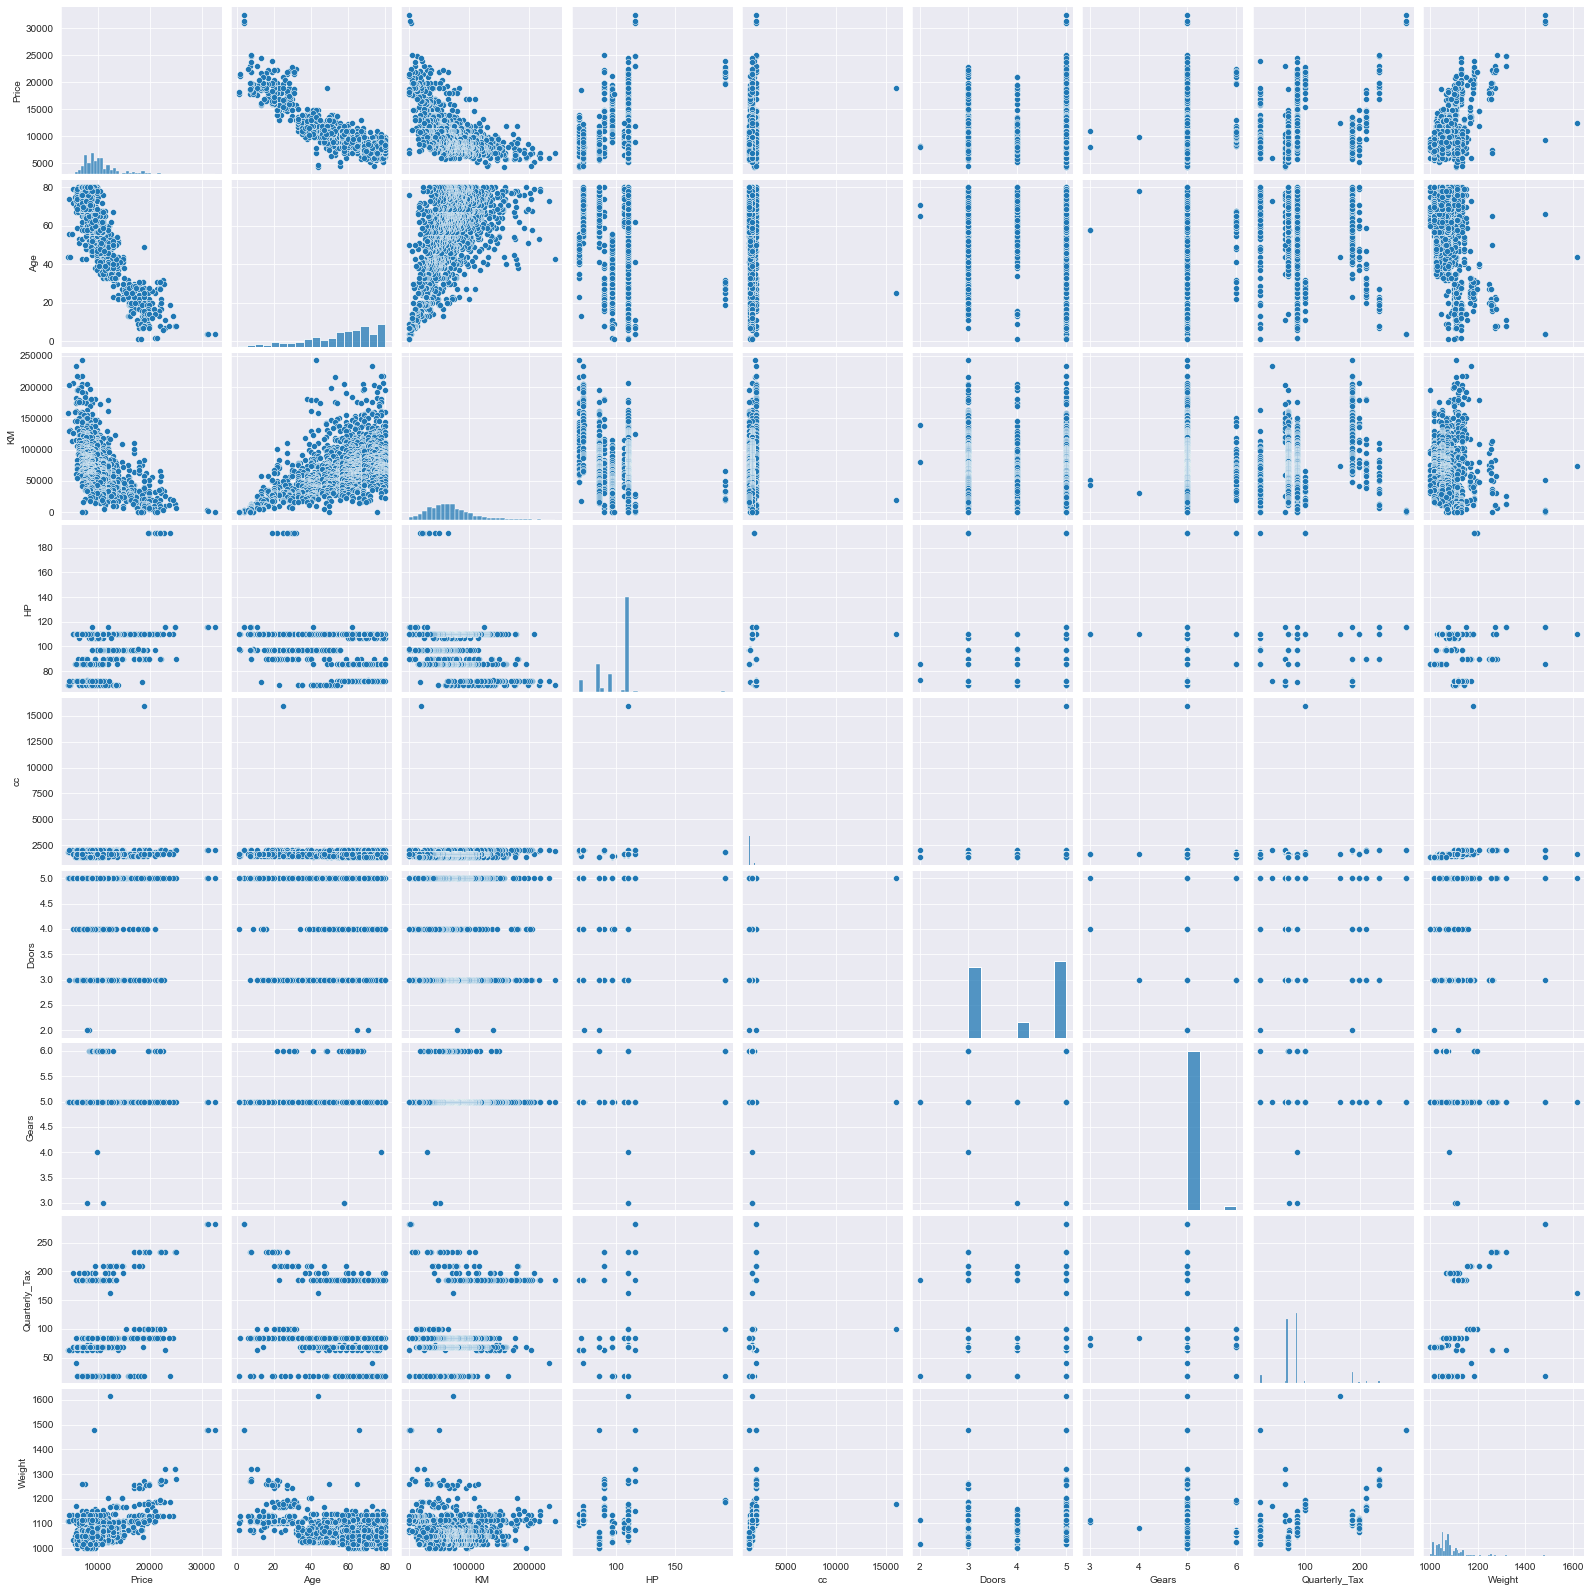

In [9]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(toyo1)

In [10]:
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age+KM+HP+Doors+cc+Gears+Quarterly_Tax+Weight', data=toyo1).fit()

In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:32:53   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_influence = model1.get_influence()
(c, _)=model_influence.cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

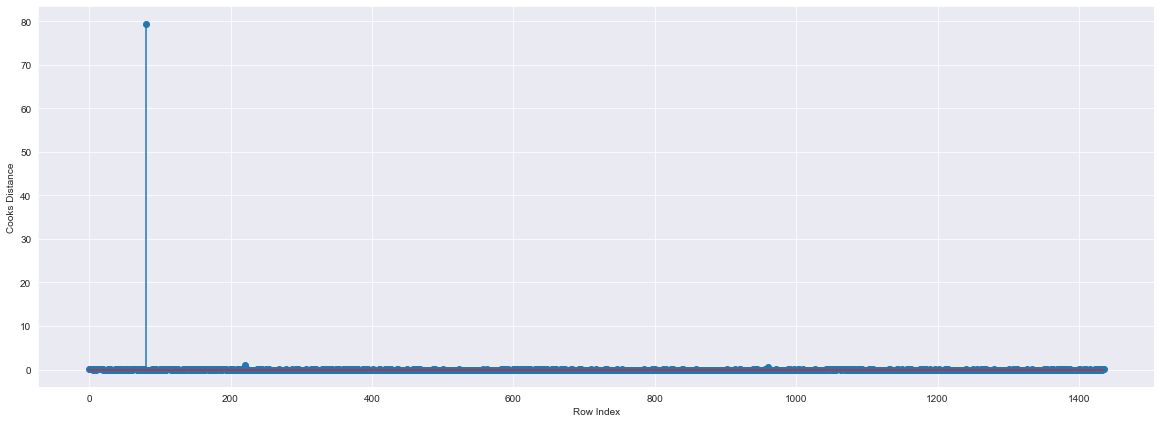

In [13]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [14]:
np.argmax(c), np.max(c)

(80, 79.52010624138254)

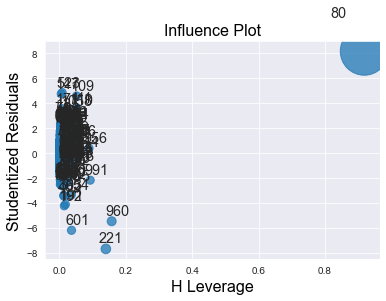

In [15]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [16]:
k = toyo1.shape[1]
n = toyo1.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020891364902506964

In [17]:
toyo_new=toyo1.drop(toyo1.index[[80,960,221,601]],axis=0).reset_index()
toyo2=toyo_new.drop(['index'],axis=1)
toyo2

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [18]:
import statsmodels.formula.api as smf
model2=smf.ols('Price~Age+KM+HP+Doors+cc+Gears+Quarterly_Tax+Weight', data=toyo2).fit()


In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1431.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:33:00   Log-Likelihood:                -12191.
No. Observations:                1432   AIC:                         2.440e+04
Df Residuals:                    1423   BIC:                         2.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.618e+04   1419.607    -11.399      0.000    -1.9e+04   -1.34e+04
Age            -110.3302      2.444    -45.149      0.000    -115.124    -105.537
KM               -0.0177      0.001    -14.976      0.000      -0.020      -0.015
HP               34.3032      2.712     12.647      0.000      28.983      39.624
Doors          -144.0434     36.899     -3.904      0.000    -216.426     -71.661
cc               -3.6876      0.297    -12.420      0.000      -4.270      -3.105
Gears           468.2073    177.621      2.636      0.008     119.779     816.635
Quarterly_Tax     3.6780      1.362      2.701      0.007       1.007       6.349
Weight           32.1958      1.283     25.085      0.000      29.678      34.713
==============================================================================
Omnibus:                       75.065   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.214
Skew:                           0.120   Prob(JB):                     6.28e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
finalmodel = smf.ols('Price~Age+KM+HP+Doors+cc+Gears+Quarterly_Tax+Weight', data=toyo2).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1431.
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:33:00   Log-Likelihood:                -12191.
No. Observations:                1432   AIC:                         2.440e+04
Df Residuals:                    1423   BIC:                         2.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.618e+04   1419.607    -11.399      0.000    -1.9e+04   -1.34e+04
Age            -110.3302      2.444    -45.149      0.000    -115.124    -105.537
KM               -0.0177      0.001    -14.976      0.000      -0.020      -0.015
HP               34.3032      2.712     12.647      0.000      28.983      39.624
Doors          -144.0434     36.899     -3.904      0.000    -216.426     -71.661
cc               -3.6876      0.297    -12.420      0.000      -4.270      -3.105
Gears           468.2073    177.621      2.636      0.008     119.779     816.635
Quarterly_Tax     3.6780      1.362      2.701      0.007       1.007       6.349
Weight           32.1958      1.283     25.085      0.000      29.678      34.713
==============================================================================
Omnibus:                       75.065   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.214
Skew:                           0.120   Prob(JB):                     6.28e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
finalmodel_pred = finalmodel.predict(toyo2)

Text(0, 0.5, 'Predicted values')

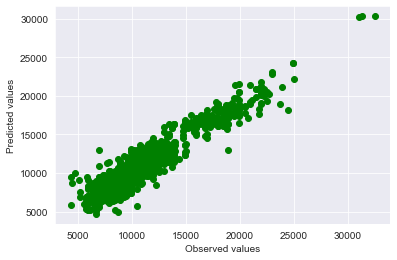

In [22]:
plt.scatter(toyo2["Price"],finalmodel_pred,color='Green');plt.xlabel("Observed values");plt.ylabel("Predicted values")

Text(0, 0.5, 'Residuals')

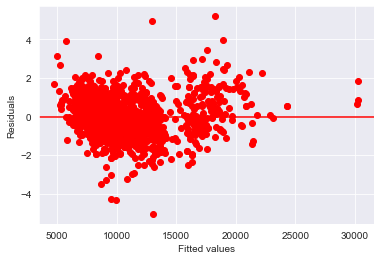

In [23]:
plt.scatter(finalmodel_pred, finalmodel.resid_pearson,color='red');
plt.axhline(y=0, color='red');
plt.xlabel("Fitted values");
plt.ylabel("Residuals")

(array([  3.,   4.,  21., 173., 589., 466., 148.,  23.,   3.,   2.]),
 array([-5.04437753, -4.02016577, -2.995954  , -1.97174224, -0.94753047,
         0.0766813 ,  1.10089306,  2.12510483,  3.1493166 ,  4.17352836,
         5.19774013]),
 <BarContainer object of 10 artists>)

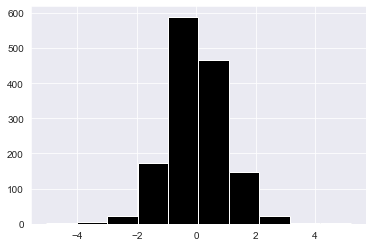

In [24]:
plt.hist(finalmodel.resid_pearson, color='black')

((array([-3.29970984, -3.04210984, -2.89883213, ...,  2.89883213,
          3.04210984,  3.29970984]),
  array([-5.04437753, -4.31436339, -4.24934012, ...,  3.98907747,
          4.95350987,  5.19774013])),
 (0.9894521685307571, -1.826850713066561e-12, 0.9905644118778703))

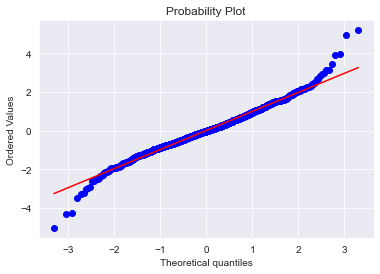

In [25]:
import pylab
import scipy.stats as st
st.probplot(finalmodel.resid_pearson, dist='norm', plot=pylab)

In [26]:
new_data=pd.DataFrame({'Age':25,'KM':40000,'HP':80,'cc':1500,'Doors':3,'Gears':5,'Quarterly_Tax':180,'Weight':1050}, index=[1])

In [27]:
new_data

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,25,40000,80,1500,3,5,180,1050


In [28]:
finalmodel.predict(new_data)

1    13941.874565
dtype: float64

In [29]:
pred_y=finalmodel.predict(toyo1)

In [30]:
pred_y

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1431     9161.797882
1432     8536.169181
1433     8681.605150
1434     8793.704782
1435    10863.423359
Length: 1436, dtype: float64

# Training and Testing Data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_data,test_Data= train_test_split(toyo1,test_size=0.3)

finalmodel1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight", data = train_data).fit()
finalmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     837.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:33:04   Log-Likelihood:                -8661.1
No. Observations:                1005   AIC:                         1.734e+04
Df Residuals:                     996   BIC:                         1.738e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7758.8739   1734.127     -4.474      0.000   -1.12e+04   -4355.912
Age            -117.8077      3.115    -37.818      0.000    -123.921    -111.695
KM               -0.0219      0.001    -14.694      0.000      -0.025      -0.019
HP               30.9264      3.355      9.217      0.000      24.342      37.511
cc               -0.0705      0.091     -0.771      0.441      -0.250       0.109
Doors           -85.6725     48.475     -1.767      0.077    -180.797       9.452
Gears           404.8757    242.372      1.670      0.095     -70.742     880.494
Quarterly_Tax     1.6333      1.573      1.039      0.299      -1.453       4.719
Weight           20.2559      1.353     14.974      0.000      17.601      22.910
==============================================================================
Omnibus:                      141.930   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1271.700
Skew:                          -0.309   Prob(JB):                    7.14e-277
Kurtosis:                       8.476   Cond. No.                     3.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
finalmodel_pred = finalmodel1.predict(train_data)

In [34]:
finalmodel_res = train_data["Price"]-finalmodel_pred

In [35]:
finalmodel_rmse = np.sqrt(np.mean(finalmodel_res*finalmodel_res))

In [36]:
finalmodel_testpred = finalmodel1.predict(test_Data)

In [37]:
finalmodel_testres= test_Data["Price"]-finalmodel_testpred

In [38]:
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))

In [39]:
finalmodel_testrmse

1360.147005794567